## MAPPING HOUSING TENURE FOR THE SANTA ROSA-PETALUMA MSA 

This is a very simple variable that just shows the total number of occupied housing units: owner occupied units and renter occupied units. We chose to this variable both for the ease in data exploration and needing understand the homeowner renter landscape in these two cities. Both have been the site of very destructive wildfires and we though it would be interesting to look at the housing tenure in a rural vs urban context.

In [1]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
srp = gpd.read_file('Santa Rosa-Petaluma MSA.geojson')

In [3]:
srp.shape

(113, 9)

In [4]:
srp.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,14000US06013990000,"Census Tract 9900, Contra Costa, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.44158 37.97239, -122.4415..."
1,14000US06033001100,"Census Tract 11, Lake, CA",1337.0,165.0,1075.0,174.0,262.0,106.0,"MULTIPOLYGON (((-122.88527 38.89424, -122.8849..."
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,275.0,1871.0,232.0,804.0,252.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
3,14000US06041101100,"Census Tract 1011, Marin, CA",1098.0,57.0,940.0,77.0,158.0,64.0,"MULTIPOLYGON (((-122.60090 38.18528, -122.6008..."
4,14000US06041133000,"Census Tract 1330, Marin, CA",1200.0,140.0,754.0,115.0,446.0,115.0,"MULTIPOLYGON (((-123.00460 38.29569, -123.0032..."


I'm not going to plot this at this stage because I don't think it's all that useful or informative. I'm also going to skip displaying all of the data because the .shape command let me know that all 113 census tracts are there.

In [5]:
srp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             113 non-null    object  
 1   name              113 non-null    object  
 2   B25003001         113 non-null    float64 
 3   B25003001, Error  113 non-null    float64 
 4   B25003002         113 non-null    float64 
 5   B25003002, Error  113 non-null    float64 
 6   B25003003         113 non-null    float64 
 7   B25003003, Error  113 non-null    float64 
 8   geometry          113 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 8.1+ KB


I forgot to add in a few other librabries from the lab so I'll do that now

In [6]:
import pandas as pd

In [7]:
import contextily as ctx

In [8]:
import matplotlib.pyplot as plt

Now I'll move on to cleaning up this data.

Fun fact: I actually do need to see all of the rows because I need to find the index numbers for each of the "summary" county rows in order to drop them. This data set is of an MSA and features four separate counties and a lot of census tracts. I need to drop the unnecessry rows. 

In [9]:
pd.set_option('display.max_rows', None)

Hmm so that was supposed to show me the entire data set. Maybe I need to do this using gpd?

In [10]:
gpd.set_option('display.max_rows',None)

AttributeError: module 'geopandas' has no attribute 'set_option'

OK. I will try the first method again.....

In [11]:
pd.set_option('display.max_rows'=None)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2790215551.py, line 1)

I really don't understand why there is no table showing all the rows.

In [13]:
# did some digging ans found this code as a possible solution. I hope it works because I am out of ideas.
pd.set_option('display.max_rows', 500)
srp.head(500)

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,14000US06013990000,"Census Tract 9900, Contra Costa, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.44158 37.97239, -122.4415..."
1,14000US06033001100,"Census Tract 11, Lake, CA",1337.0,165.0,1075.0,174.0,262.0,106.0,"MULTIPOLYGON (((-122.88527 38.89424, -122.8849..."
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,275.0,1871.0,232.0,804.0,252.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
3,14000US06041101100,"Census Tract 1011, Marin, CA",1098.0,57.0,940.0,77.0,158.0,64.0,"MULTIPOLYGON (((-122.60090 38.18528, -122.6008..."
4,14000US06041133000,"Census Tract 1330, Marin, CA",1200.0,140.0,754.0,115.0,446.0,115.0,"MULTIPOLYGON (((-123.00460 38.29569, -123.0032..."
5,14000US06041990100,"Census Tract 9901, Marin, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.47402 37.85347, -122.4738..."
6,14000US06045011102,"Census Tract 111.02, Mendocino, CA",1879.0,159.0,1283.0,158.0,596.0,131.0,"MULTIPOLYGON (((-123.74648 38.95688, -123.7462..."
7,14000US06045011800,"Census Tract 118, Mendocino, CA",762.0,88.0,420.0,66.0,342.0,80.0,"MULTIPOLYGON (((-123.32779 38.99925, -123.3274..."
8,14000US06045990100,"Census Tract 9901, Mendocino, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-124.13489 40.00247, -124.1261..."
9,14000US06055201102,"Census Tract 2011.02, Napa, CA",717.0,82.0,554.0,74.0,163.0,56.0,"MULTIPOLYGON (((-122.47240 38.40568, -122.4723..."


In [14]:
# I'm going to drop the row with index 0 and repeat for index 5,6 and 112. Those are the summary counties.

In [15]:
srp = srp.drop([0])

In [16]:
# I'm going to make sure that worked before continuing
srp.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
1,14000US06033001100,"Census Tract 11, Lake, CA",1337.0,165.0,1075.0,174.0,262.0,106.0,"MULTIPOLYGON (((-122.88527 38.89424, -122.8849..."
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,275.0,1871.0,232.0,804.0,252.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
3,14000US06041101100,"Census Tract 1011, Marin, CA",1098.0,57.0,940.0,77.0,158.0,64.0,"MULTIPOLYGON (((-122.60090 38.18528, -122.6008..."
4,14000US06041133000,"Census Tract 1330, Marin, CA",1200.0,140.0,754.0,115.0,446.0,115.0,"MULTIPOLYGON (((-123.00460 38.29569, -123.0032..."
5,14000US06041990100,"Census Tract 9901, Marin, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.47402 37.85347, -122.4738..."


In [17]:
# Now on to index 5
srp = srp.drop([5])

In [18]:
# I feel like I should make sure that worked and check the order of the rows now
srp.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
1,14000US06033001100,"Census Tract 11, Lake, CA",1337.0,165.0,1075.0,174.0,262.0,106.0,"MULTIPOLYGON (((-122.88527 38.89424, -122.8849..."
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,275.0,1871.0,232.0,804.0,252.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
3,14000US06041101100,"Census Tract 1011, Marin, CA",1098.0,57.0,940.0,77.0,158.0,64.0,"MULTIPOLYGON (((-122.60090 38.18528, -122.6008..."
4,14000US06041133000,"Census Tract 1330, Marin, CA",1200.0,140.0,754.0,115.0,446.0,115.0,"MULTIPOLYGON (((-123.00460 38.29569, -123.0032..."
6,14000US06045011102,"Census Tract 111.02, Mendocino, CA",1879.0,159.0,1283.0,158.0,596.0,131.0,"MULTIPOLYGON (((-123.74648 38.95688, -123.7462..."


In [19]:
# cool. so it just deletes the row entirely. good to know.

In [20]:
srp = srp.drop([8])

In [21]:
srp = srp.drop([112])

In [22]:
# now I'll check the whole data set again
pd.set_option('display.max_rows', 500)
srp.head(500)

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
1,14000US06033001100,"Census Tract 11, Lake, CA",1337.0,165.0,1075.0,174.0,262.0,106.0,"MULTIPOLYGON (((-122.88527 38.89424, -122.8849..."
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,275.0,1871.0,232.0,804.0,252.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
3,14000US06041101100,"Census Tract 1011, Marin, CA",1098.0,57.0,940.0,77.0,158.0,64.0,"MULTIPOLYGON (((-122.60090 38.18528, -122.6008..."
4,14000US06041133000,"Census Tract 1330, Marin, CA",1200.0,140.0,754.0,115.0,446.0,115.0,"MULTIPOLYGON (((-123.00460 38.29569, -123.0032..."
6,14000US06045011102,"Census Tract 111.02, Mendocino, CA",1879.0,159.0,1283.0,158.0,596.0,131.0,"MULTIPOLYGON (((-123.74648 38.95688, -123.7462..."
7,14000US06045011800,"Census Tract 118, Mendocino, CA",762.0,88.0,420.0,66.0,342.0,80.0,"MULTIPOLYGON (((-123.32779 38.99925, -123.3274..."
9,14000US06055201102,"Census Tract 2011.02, Napa, CA",717.0,82.0,554.0,74.0,163.0,56.0,"MULTIPOLYGON (((-122.47240 38.40568, -122.4723..."
10,14000US06055201500,"Census Tract 2015, Napa, CA",717.0,83.0,543.0,75.0,174.0,60.0,"MULTIPOLYGON (((-122.56947 38.52966, -122.5685..."
11,14000US06055201900,"Census Tract 2019, Napa, CA",562.0,71.0,413.0,62.0,149.0,53.0,"MULTIPOLYGON (((-122.64642 38.59859, -122.6462..."
12,14000US06095250801,"Census Tract 2508.01, Solano, CA",1533.0,103.0,645.0,90.0,888.0,118.0,"MULTIPOLYGON (((-122.40697 38.15565, -122.4067..."


In [23]:
# this method is the same as df.columns.to_list()
list(srp)

['geoid',
 'name',
 'B25003001',
 'B25003001, Error',
 'B25003002',
 'B25003002, Error',
 'B25003003',
 'B25003003, Error',
 'geometry']

In [24]:
# so I'm going to get rid of all the Error rows. they show the margin of error and while that is important to know, it's not really necessary.
columns_to_keep = ['geoid','name','B25003001','B25003002','B25003003','geometry']

In [25]:
# now I'll redefine srp with the columns I've chosen above
srp = srp[columns_to_keep]

In [26]:
srp.head()

,geoid,name,B25003001,B25003002,B25003003,geometry
1,14000US06033001100,"Census Tract 11, Lake, CA",1337.0,1075.0,262.0,"MULTIPOLYGON (((-122.88527 38.89424, -122.8849..."
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,1871.0,804.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
3,14000US06041101100,"Census Tract 1011, Marin, CA",1098.0,940.0,158.0,"MULTIPOLYGON (((-122.60090 38.18528, -122.6008..."
4,14000US06041133000,"Census Tract 1330, Marin, CA",1200.0,754.0,446.0,"MULTIPOLYGON (((-123.00460 38.29569, -123.0032..."
6,14000US06045011102,"Census Tract 111.02, Mendocino, CA",1879.0,1283.0,596.0,"MULTIPOLYGON (((-123.74648 38.95688, -123.7462..."


Important note: I used the totals and not percentages version of this data set. Not for any particular reason, I just didn't realize the totals was what I was downloading. It's seems fine though.

In [27]:
# time to rename the columns!
srp.columns = ['geoid','Census Tract','Total Occupied Housing Units','Owner Occupied Units','Renter Occupied Units','geometry']

In [28]:
srp.head()

,geoid,Census Tract,Total Occupied Housing Units,Owner Occupied Units,Renter Occupied Units,geometry
1,14000US06033001100,"Census Tract 11, Lake, CA",1337.0,1075.0,262.0,"MULTIPOLYGON (((-122.88527 38.89424, -122.8849..."
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,1871.0,804.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
3,14000US06041101100,"Census Tract 1011, Marin, CA",1098.0,940.0,158.0,"MULTIPOLYGON (((-122.60090 38.18528, -122.6008..."
4,14000US06041133000,"Census Tract 1330, Marin, CA",1200.0,754.0,446.0,"MULTIPOLYGON (((-123.00460 38.29569, -123.0032..."
6,14000US06045011102,"Census Tract 111.02, Mendocino, CA",1879.0,1283.0,596.0,"MULTIPOLYGON (((-123.74648 38.95688, -123.7462..."


Awesome.

In [29]:
# now I'm going to run some stats using the Renter Occupied columns. Considering this MSA could be seen as rural, I'm excited to see what the early stats show.
srp['Renter Occupied Units'].head()

1    262.0
2    804.0
3    158.0
4    446.0
6    596.0
Name: Renter Occupied Units, dtype: float64

In [30]:
srp['Renter Occupied Units'].mean()

706.0825688073395

In [31]:
srp['Renter Occupied Units'].median()

627.0

In [32]:
srp['Renter Occupied Units'].describe()

count     109.000000
mean      706.082569
std       403.692245
min       100.000000
25%       445.000000
50%       627.000000
75%       903.000000
max      2024.000000
Name: Renter Occupied Units, dtype: float64

<AxesSubplot:ylabel='Frequency'>

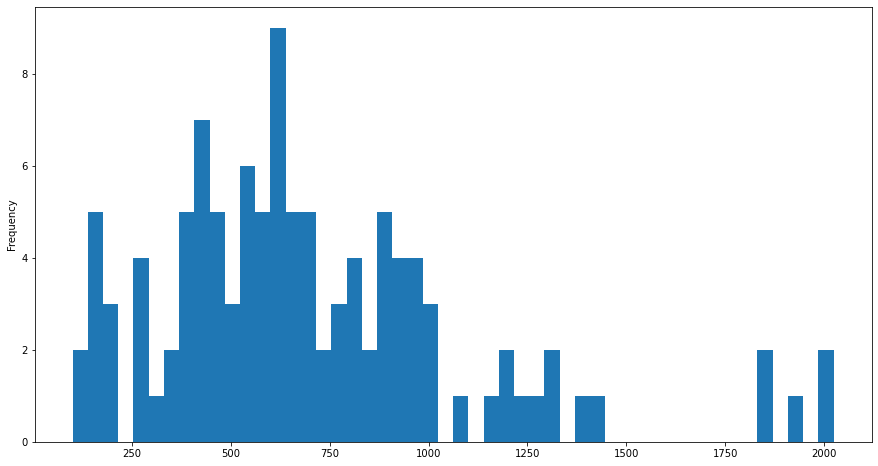

In [33]:
# I'm going to plot it as a histogram
srp['Renter Occupied Units'].plot.hist(figsize=(15,8), bins=50)

Now I am going to move on to sorting this data. I'm interested in which census tracts have the highest amount of renters vs the highest amout of homeowners.

In [34]:
srp_sorted = srp.sort_values(by='Renter Occupied Units',ascending = False)

In [35]:
srp_sorted[['Census Tract','Renter Occupied Units']].head(10)

,Census Tract,Renter Occupied Units
49,"Census Tract 1514.02, Sonoma, CA",2024.0
71,"Census Tract 1528.02, Sonoma, CA",2001.0
76,"Census Tract 1530.01, Sonoma, CA",1909.0
41,"Census Tract 1513.05, Sonoma, CA",1853.0
55,"Census Tract 1517, Sonoma, CA",1838.0
85,"Census Tract 1533, Sonoma, CA",1443.0
50,"Census Tract 1515.02, Sonoma, CA",1371.0
84,"Census Tract 1532, Sonoma, CA",1310.0
48,"Census Tract 1514.01, Sonoma, CA",1295.0
24,"Census Tract 1506.03, Sonoma, CA",1291.0


In [36]:
# now I'll do the same sequence for owner occupied units
srp_sorted = srp.sort_values(by='Owner Occupied Units',ascending = False)

In [37]:
srp_sorted[['Census Tract','Owner Occupied Units']].head(10)

,Census Tract,Owner Occupied Units
64,"Census Tract 1524, Sonoma, CA",2809.0
67,"Census Tract 1526, Sonoma, CA",2451.0
85,"Census Tract 1533, Sonoma, CA",2391.0
96,"Census Tract 1538.01, Sonoma, CA",2116.0
17,"Census Tract 1503.03, Sonoma, CA",2026.0
37,"Census Tract 1512.01, Sonoma, CA",1955.0
80,"Census Tract 1530.06, Sonoma, CA",1915.0
79,"Census Tract 1530.05, Sonoma, CA",1903.0
2,"Census Tract 13, Lake, CA",1871.0
108,"Census Tract 1542.02, Sonoma, CA",1769.0


<AxesSubplot:>

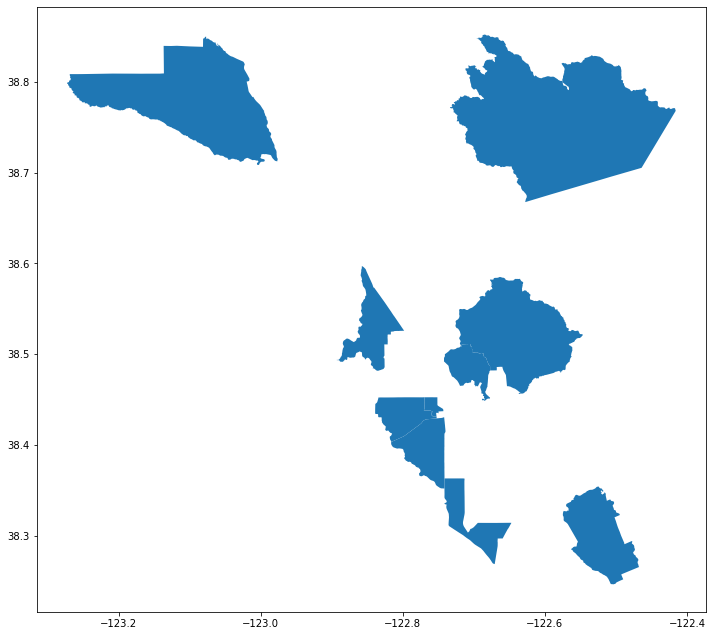

In [38]:
# I'm plotting this to see what it looks like
srp_sorted.head(10).plot(figsize=(12,12))

<AxesSubplot:>

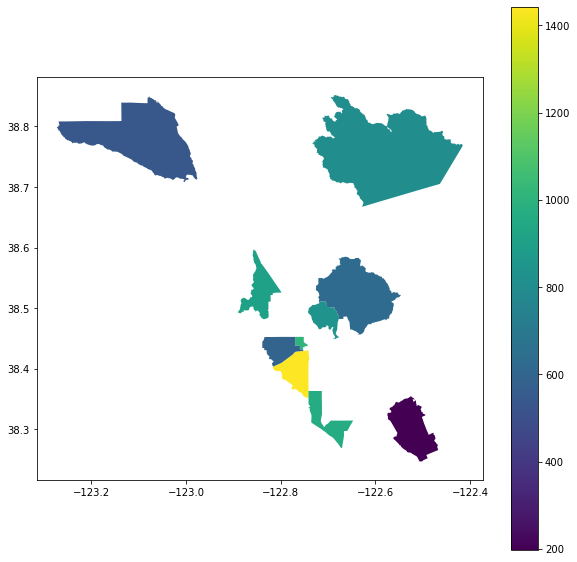

In [39]:
# adding in color to make it easier to understand
srp_sorted.head(10).plot(figsize=(10,10),
                         column='Renter Occupied Units',
                         legend=True)

In [40]:
# ok so I'm going to try and query the owner occupied column but I want to do an greater than or equal to filter
srp[srp['Owner Occupied Units']==>=2000]

SyntaxError: invalid syntax (2084843066.py, line 2)

In [43]:
# hmm let's try another way
srp[srp['Owner Occupied Units']>=2000]

,geoid,Census Tract,Total Occupied Housing Units,Owner Occupied Units,Renter Occupied Units,geometry
17,14000US06097150303,"Census Tract 1503.03, Sonoma, CA",2223.0,2026.0,197.0,"MULTIPOLYGON (((-122.57467 38.32374, -122.5745..."
64,14000US06097152400,"Census Tract 1524, Sonoma, CA",3645.0,2809.0,836.0,"MULTIPOLYGON (((-122.74200 38.49212, -122.7419..."
67,14000US06097152600,"Census Tract 1526, Sonoma, CA",3078.0,2451.0,627.0,"MULTIPOLYGON (((-122.72588 38.53132, -122.7258..."
85,14000US06097153300,"Census Tract 1533, Sonoma, CA",3834.0,2391.0,1443.0,"MULTIPOLYGON (((-122.81640 38.40122, -122.8163..."
96,14000US06097153801,"Census Tract 1538.01, Sonoma, CA",3019.0,2116.0,903.0,"MULTIPOLYGON (((-122.89305 38.49379, -122.8909..."


In [45]:
# I'm going to do this sequence for renter occupied units and then make a new variable for census tracts with greater than 700 renter occupied units.

In [46]:
srp[srp['Renter Occupied Units']>=700]

,geoid,Census Tract,Total Occupied Housing Units,Owner Occupied Units,Renter Occupied Units,geometry
2,14000US06033001300,"Census Tract 13, Lake, CA",2675.0,1871.0,804.0,"MULTIPOLYGON (((-122.73362 38.77174, -122.7334..."
12,14000US06095250801,"Census Tract 2508.01, Solano, CA",1533.0,645.0,888.0,"MULTIPOLYGON (((-122.40697 38.15565, -122.4067..."
14,14000US06097150202,"Census Tract 1502.02, Sonoma, CA",2238.0,1414.0,824.0,"MULTIPOLYGON (((-122.48370 38.29980, -122.4837..."
15,14000US06097150203,"Census Tract 1502.03, Sonoma, CA",2160.0,1426.0,734.0,"MULTIPOLYGON (((-122.47759 38.29188, -122.4775..."
18,14000US06097150304,"Census Tract 1503.04, Sonoma, CA",2234.0,1528.0,706.0,"MULTIPOLYGON (((-122.50205 38.32044, -122.5019..."
19,14000US06097150305,"Census Tract 1503.05, Sonoma, CA",1799.0,793.0,1006.0,"MULTIPOLYGON (((-122.50755 38.33991, -122.5072..."
24,14000US06097150603,"Census Tract 1506.03, Sonoma, CA",2866.0,1575.0,1291.0,"MULTIPOLYGON (((-122.63444 38.25033, -122.6343..."
30,14000US06097150701,"Census Tract 1507.01, Sonoma, CA",2059.0,994.0,1065.0,"MULTIPOLYGON (((-122.64597 38.23426, -122.6458..."
32,14000US06097150800,"Census Tract 1508, Sonoma, CA",2012.0,1128.0,884.0,"MULTIPOLYGON (((-122.70440 38.19849, -122.7042..."
33,14000US06097150901,"Census Tract 1509.01, Sonoma, CA",2041.0,1056.0,985.0,"MULTIPOLYGON (((-122.66016 38.26051, -122.6600..."


In [48]:
srp_renter_majority = srp[srp['Renter Occupied Units']>=700]

In [49]:
# how many records
print('There are' + str(len(srp_renter_majority)) + 'census tracts with more than 700 renter occupied units')

There are44census tracts with more than 700 renter occupied units


In [51]:
# display it
srp_renter_majority[['geoid','Census Tract','Renter Occupied Units']]

,geoid,Census Tract,Renter Occupied Units
2,14000US06033001300,"Census Tract 13, Lake, CA",804.0
12,14000US06095250801,"Census Tract 2508.01, Solano, CA",888.0
14,14000US06097150202,"Census Tract 1502.02, Sonoma, CA",824.0
15,14000US06097150203,"Census Tract 1502.03, Sonoma, CA",734.0
18,14000US06097150304,"Census Tract 1503.04, Sonoma, CA",706.0
19,14000US06097150305,"Census Tract 1503.05, Sonoma, CA",1006.0
24,14000US06097150603,"Census Tract 1506.03, Sonoma, CA",1291.0
30,14000US06097150701,"Census Tract 1507.01, Sonoma, CA",1065.0
32,14000US06097150800,"Census Tract 1508, Sonoma, CA",884.0
33,14000US06097150901,"Census Tract 1509.01, Sonoma, CA",985.0


<AxesSubplot:>

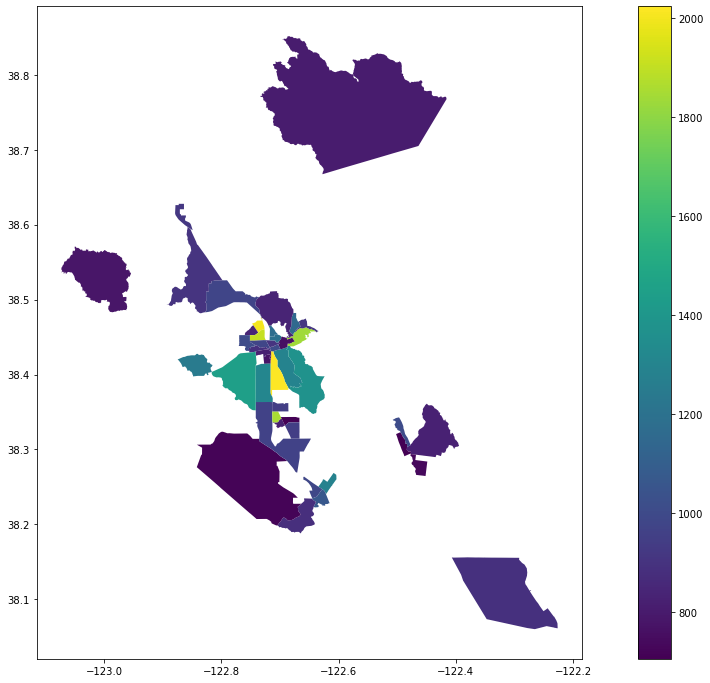

In [53]:
# let's see what this plot looks like now
srp_renter_majority.plot(
    figsize = (20,12),
    column = 'Renter Occupied Units',
    legend = True)

Now I'll go in create new columns that show percentages for each data point.

In [59]:
# create a new column and populate it with normalized data to get the percent of the total value
srp['Percent Owner Occupied Units'] = srp['Owner Occupied Units']/srp['Total Occupied Housing Units']*100
srp['Percent Renter Occupied Units'] = srp['Renter Occupied Units']/srp['Total Occupied Housing Units']*100

In [61]:
srp.sample(5)

,geoid,Census Tract,Total Occupied Housing Units,Owner Occupied Units,Renter Occupied Units,geometry,Percent Owner Occupuied Units,Percent Renter Occupuied Units,Percent Owner Occupied Units,Percent Renter Occupied Units
108,14000US06097154202,"Census Tract 1542.02, Sonoma, CA",2302.0,1769.0,533.0,"MULTIPOLYGON (((-123.27266 38.79839, -123.2718...",76.846221,23.153779,76.846221,23.153779
111,14000US06097154304,"Census Tract 1543.04, Sonoma, CA",1088.0,697.0,391.0,"MULTIPOLYGON (((-123.49916 38.77833, -123.4973...",64.062500,35.937500,64.062500,35.937500
69,14000US06097152702,"Census Tract 1527.02, Sonoma, CA",1838.0,863.0,975.0,"MULTIPOLYGON (((-122.83026 38.48297, -122.8300...",46.953210,53.046790,46.953210,53.046790
12,14000US06095250801,"Census Tract 2508.01, Solano, CA",1533.0,645.0,888.0,"MULTIPOLYGON (((-122.40697 38.15565, -122.4067...",42.074364,57.925636,42.074364,57.925636
40,14000US06097151301,"Census Tract 1513.01, Sonoma, CA",1659.0,840.0,819.0,"MULTIPOLYGON (((-122.71216 38.33592, -122.7121...",50.632911,49.367089,50.632911,49.367089


Here are some maps.

<AxesSubplot:>

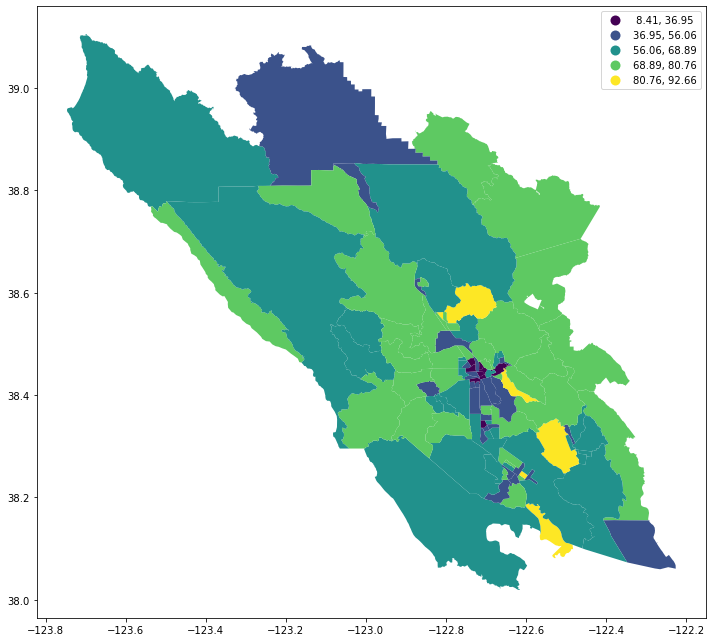

In [62]:
# natural breaks
srp.plot(figsize=(12,12),
         column='Percent Owner Occupied Units',
         legend=True,
         scheme='NaturalBreaks')

<AxesSubplot:>

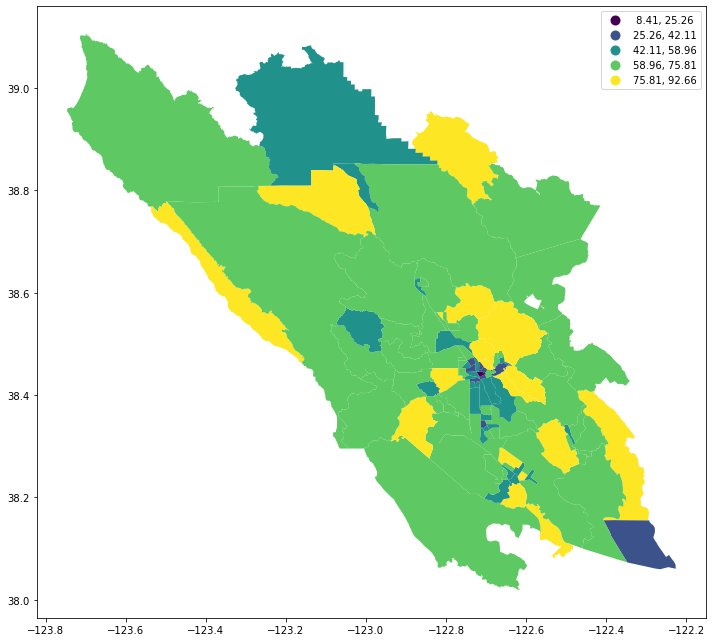

In [68]:
# equal intervals
srp.plot(figsize=(12,12),
         column='Percent Owner Occupied Units',
         legend=True,
         scheme='equal_interval')

<AxesSubplot:>

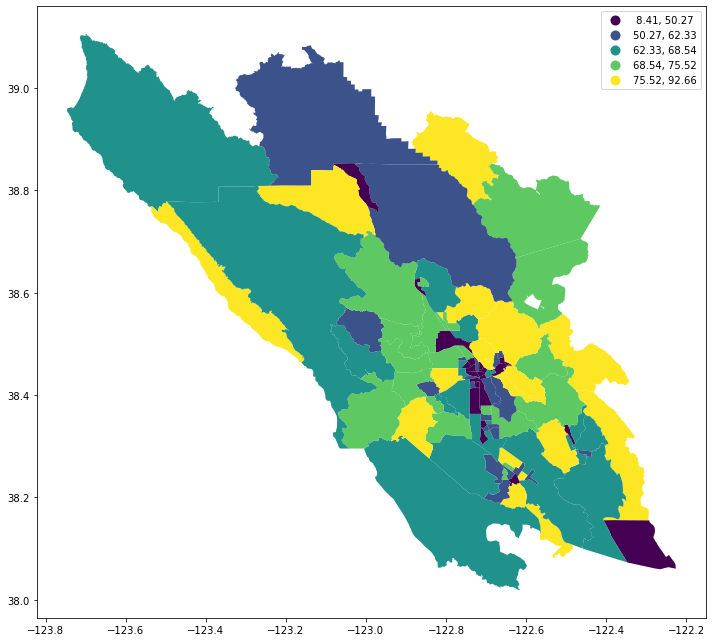

In [67]:
#quantiles
srp.plot(figsize=(12,12),
         column='Percent Owner Occupied Units',
         legend=True,
         scheme='quantiles')

In [69]:
# I kind of like this color scheme so I'm not going to mess with it

I do want to put in my own custom breaks though to make this easier to understand.

<AxesSubplot:>

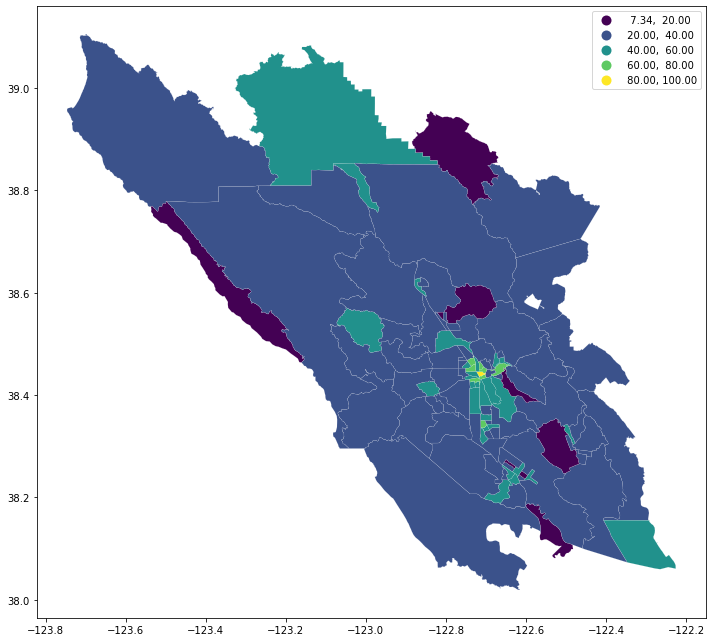

In [70]:
srp.plot(figsize=(12,12),
         column='Percent Renter Occupied Units',
         legend=True,
         scheme='user_defined',
         classification_kwds={'bins':[20,40,60,80,100]},
         edgecolor='white',
         linewidth=0.1
        )

<AxesSubplot:>

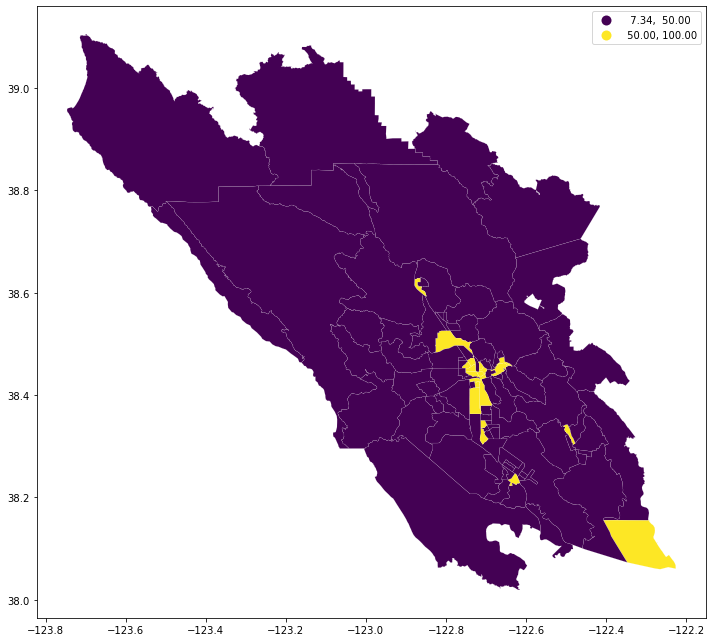

In [71]:
# here is one just to see which census tracts are have at least 50% rentter occupied units
srp.plot(figsize=(12,12),
         column='Percent Renter Occupied Units',
         legend=True,
         scheme='user_defined',
         classification_kwds={'bins':[50,100]},
         edgecolor='white',
         linewidth=0.1
        )

The colors are awful but you get idea

A basemap seems like it would be interesting to add here so let's do that.

In [74]:
# reproject to Web Mercator
srp_web_mercator = srp.to_crs(epsg=3857)

In [75]:
# I hope that's correct...

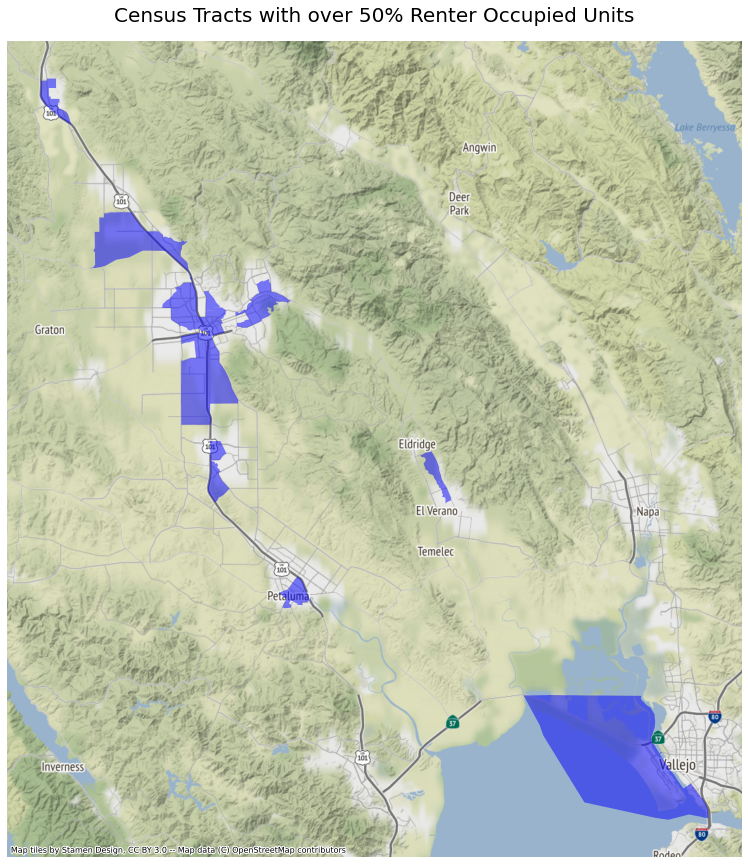

In [94]:
fig, ax = plt.subplots(figsize=(15,15))
srp_web_mercator[srp_web_mercator['Percent Renter Occupied Units'] > 50].plot(
                                                                            ax=ax,
                                                                            color="blue",
                                                                            alpha=0.5
)

ax.axis('off')
ax.set_title('Census Tracts with over 50% Renter Occupied Units',fontsize=20,pad=20)

#add a basemap
ctx.add_basemap(ax)

And I'm done!